## ZIPF'S LAW VALIDATION BY PLOTTING WORD FREQUENCY <BR>
<font color=red>Word Frequency distribution can be considered as one of the basic statistical analysis that can be done on text data.<BR>
Zipf's Law is a discrete probability distribution for the frequency of the words in the corpus or in other terms probability of encountering a word in the corpus. Ranking is done in such a way that, rank 1 is given to the most frequent word, rank 2 to the next frequent, and so on. This also indicates that Zipf's law follows power-law distribution. </font>
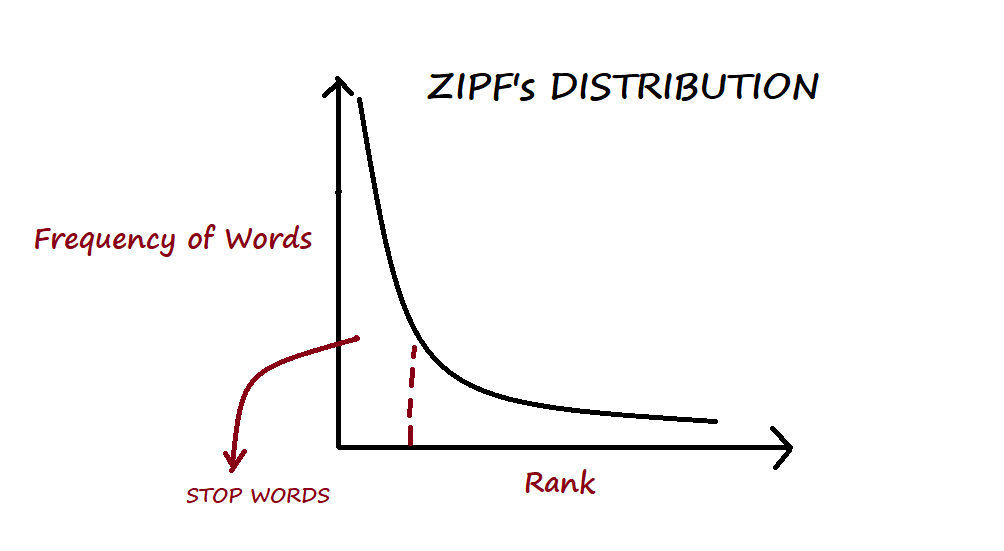    
    
As you an see from the plot above, the Language Builder words (For Example: is,an,the) or words that can be called as STOPWORDS would be the most frequent words in your dataset and the least significant words, since they do not add any useful information.
<HR>
In this notebook we can validate Zipf's law, whether it holds true with our corpus by plotting the word frequencies.
    </hr>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the String module
import string
from nltk import FreqDist
from nltk.corpus import stopwords

In [2]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

In [4]:
#Reading the train file
df = pd.read_csv("/kaggle/input/spooky-author-identification/train.zip")

In [5]:
#Head of the dataframe
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [6]:
#Dimension of the dataframe
df.shape

(19579, 3)

There are 19579 excerpts in our train set.

From the first few columns, we can see that there are many punctuations present in the text data like `Comma` which we will clean before creating the text corpus, so that it wont impact the final words.

In [7]:
#Python provides a constant called string.punctuation that provides a great list of punctuation characters. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

In [9]:
#Applying the remove_punctuation function
df['text'] = df['text'].apply(remove_punctuations)

In [10]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [11]:
#Building the corpus
corpus = build_corpus(df['text'])

In [12]:
#Converting all the words into lowercase
corpus = corpus.lower()

In [13]:
#Some part of the Text Corpus
corpus[:1000]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wallit never once occurred to me that the fumbling might be a mere mistakein his left hand was a gold snuff box from which as he capered down the hill cutting all manner of fantastic steps he took snuff incessantly with an air of the greatest possible self satisfactionhow lovely is spring as we looked from windsor terrace on the sixteen fertile counties spread beneath speckled by happy cottages and wealthier towns all looked as in former years heart cheering and fairfinding nothing else not even gold the superintendent abandoned his attempts but a perplexed look occasionally steals over his countenance as he sits thinking at his deska youth passed in solitude my best years spent under your gentle and feminine fosterage has so refined the groundwork of my character that

If you skim through the Corpus, you can find that we are having a clean text corpus as of now. We will go ahead and create a word list now.

In [14]:
#Splitting the entire corpus
corpus = corpus.split()

In [15]:
#Observing the first few words
print(corpus[:50])

['this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wallit', 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might']


In [16]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

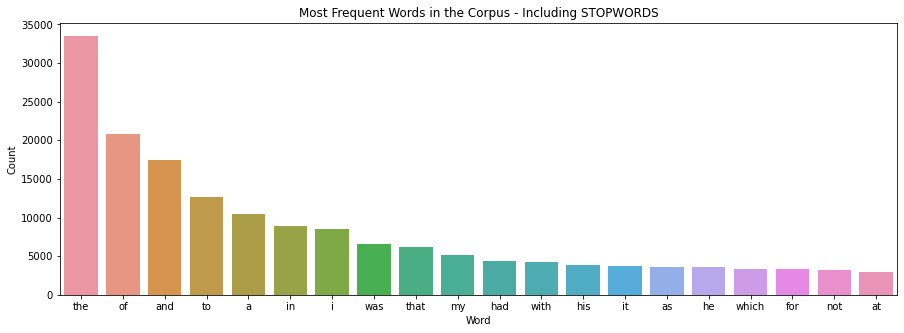

In [17]:
plot_word_frequency(corpus,20)

You can find that, most of the words present over here in the top occuring list are STOPWORDS and the most frequenct word here is `the` and that is obvious. <br>
This is in line with what we were expecting - The most frequent words in the corpus are Language Builders.
We can remove the stopwords and try plotting again to find out the most occuring words in the corpus

In [18]:
corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]

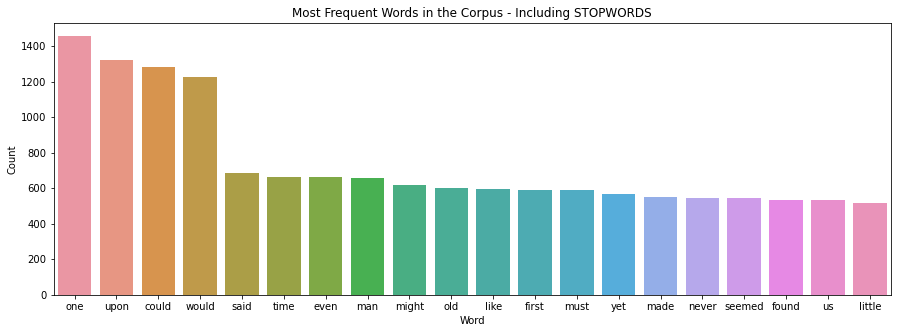

In [19]:
plot_word_frequency(corpus_without_stop,20)

We can now see the most frequent words of the corpus after removing stopwords.These are just 20 most frquent words, but there are many others too and these words would be the words with most significance in our corpus and which lies in the middle range of the Zip's Law distribution. 

### LOG-LOG PLOT for Frequency vs Rank

In [20]:
#Creating a FreqDist object
fd=FreqDist()

In [22]:
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

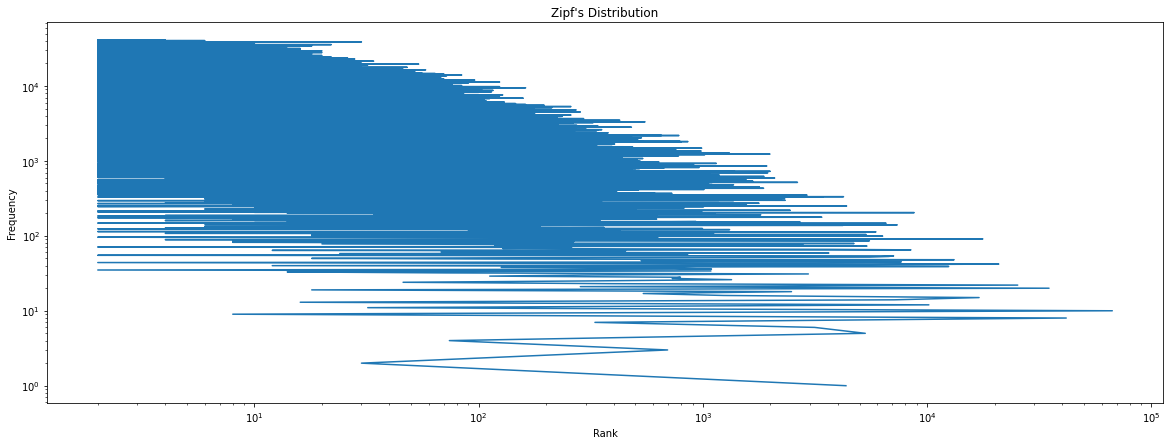

In [23]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()